In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import csv
import pandas as pd

In [3]:
# f = open('Clinton-NY.csv')
# csv_rows = csv.reader(f)

# csv_rows[0]


df = pd.read_csv('Sanders-WI.csv')

In [4]:
df.head()
# contbr_occupation = donation amt
# contb_receipt_amt = donation date

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
C00577130,P60007168,"Sanders, Bernard","WELLS, CONNIE",FRANKLIN,WI,531328576,INTERNATIONAL FOUNDATION OF EMPLOYEE B,EXECUTIVE MANAGEMENT,50,27-FEB-16,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1056899,VPF7BKJRP03,P2016,NaN
C00577130,P60007168,"Sanders, Bernard","TURNER, NICK",LA CROSSE,WI,546032500,MARKETSHARP SOFTWARE,SOFTWARE ENGINEER,27,26-FEB-16,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1056899,VPF7BKNCKC3,P2016,NaN
C00577130,P60007168,"Sanders, Bernard","TURNER, NICK",LA CROSSE,WI,546032500,MARKETSHARP SOFTWARE,SOFTWARE ENGINEER,50,26-FEB-16,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1056899,VPF7BKND3G9,P2016,NaN
C00577130,P60007168,"Sanders, Bernard","DREWERY, CRAIG",WAUKESHA,WI,531882890,SIGMA ALDRICH,QUALITY ASSURANCE SPECIALIST,15,29-FEB-16,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1056899,VPF7BK6CB32,P2016,NaN
C00577130,P60007168,"Sanders, Bernard","DREWERY, CRAIG",WAUKESHA,WI,531882890,SIGMA ALDRICH,QUALITY ASSURANCE SPECIALIST,35,29-FEB-16,NaN,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,SA17A,1056899,VPF7BK9V1H6,P2016,NaN


In [5]:
df.cand_id.head()

C00577130    Sanders, Bernard
C00577130    Sanders, Bernard
C00577130    Sanders, Bernard
C00577130    Sanders, Bernard
C00577130    Sanders, Bernard
Name: cand_id, dtype: object

In [6]:
df2 = pd.DataFrame({'date' : df.contb_receipt_amt, 'amt' : df.contbr_occupation})

In [7]:
df3 = df2.sort(['date'])

In [8]:
df3['cum_amt'] = df3.amt.cumsum()
df3.head()

,amt,date,cum_amt
C00577130,100.00,01-AUG-15,100.00
C00577130,25.00,01-AUG-15,125.00
C00577130,5.00,01-AUG-15,130.00
C00577130,191.05,01-AUG-15,321.05
C00577130,314.88,01-AUG-15,635.93


In [9]:
df_len = len(df3.index)
bucket_size = int(df_len/1000)
idx_date = []
idx = 0
curr_date = df3.date[0]
for i in df3.date:
    if i != curr_date:
        curr_date = i
        idx += 1
    idx_date.append(idx)
df3['idx_date'] = idx_date
df3.head()

,amt,date,cum_amt,idx_date
C00577130,100.00,01-AUG-15,100.00,0
C00577130,25.00,01-AUG-15,125.00,0
C00577130,5.00,01-AUG-15,130.00,0
C00577130,191.05,01-AUG-15,321.05,0
C00577130,314.88,01-AUG-15,635.93,0


In [10]:
compressed_idx = []
compressed_amt = []
compressed_cum_amt = []
i = 0
for index, row in df3.iterrows():
    if i % bucket_size == 0:
        compressed_idx.append(row['idx_date'])
        compressed_amt.append(row['amt'])
        compressed_cum_amt.append(row['cum_amt'])
    compressed_amt[-1] += row['amt']
    compressed_cum_amt[-1] += row['cum_amt']
    i += 1

df4 = pd.DataFrame({'date_idx' : compressed_idx, 'amt' : compressed_amt, 'cum_amt' : compressed_cum_amt})
df4.head()

,amt,cum_amt,date_idx
0,848.40,4205.64,0
1,311.00,9065.00,1
2,505.00,13424.00,1
3,408.45,16923.15,1
4,298.60,19099.30,2


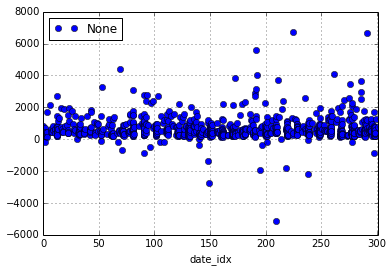

In [11]:
df4.plot(x='date_idx', y='amt', style='o')

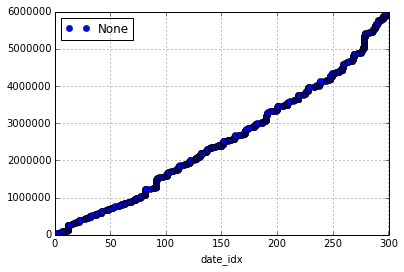

In [12]:
df4.plot(x='date_idx', y='cum_amt', style='o')

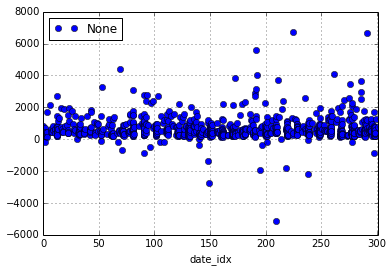

In [13]:
df4.plot(x='date_idx', y='amt', style='o')

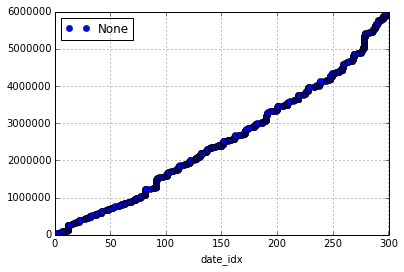

In [14]:
df4.plot(x='date_idx', y='cum_amt', style='o')